# Домашнее задание
Анализ данных

Ознакомление с датасетом (по чату выше ссылки). Понять каждый столбец - суть данных, какой тип данных. Знать методики лечения онкологии не нужно, надо просто внимательно просмотреть датасет, отметить для себя какие данные в каждом из них хранятся, как лучше с ними в дальнейшем работать (где-то есть текстовые поля, где-то логические true/false и т.п.).

In [ ]:
import matplotlib.pyplot as plt # matplotlib для графиков
import seaborn as sns # seaborn для графиков
import numpy as np    # Нампай для массивов
import pandas as pd   # Пандас для данных
import re             # Регулярные выражения
from tensorflow.keras import utils # Для приведения к категориальным данным
from google.colab import files     # Загрузка файлов

In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls


sample_data


In [ ]:
! cd ..

In [ ]:
! ls /Копия отправка_комбинации поддержка после ПХТ 3 стадия - отправка.csv

sample_data


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Копия отправка_комбинации поддержка после ПХТ 3 стадия - отправка.csv') # pd.read_excel('/content/drive/My Drive/hh_parsed_new.csv')

In [ ]:
#data = pd.read_csv('/Копия отправка_комбинации поддержка после ПХТ 3 стадия - отправка.csv')

In [ ]:
data

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [ ]:
# посмотрим непустые значения
data.count()

id_ответа                                                   248832
Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  24

Все поля заполены

In [ ]:
# посмотрим типы данных в столбцах
data.dtypes

id_ответа                                                    int64
Раса                                                        object
Пол                                                         object
Возраст                                                     object
Статус курения                                              object
ECOG                                                        object
Есть опухолевая нагрузка? (симптомная опухоль)              object
Ко-мутации KRAS                                             object
Ко-мутации p53.                                             object
Ко-мутации STK11                                            object
Ко-мутации KEAP1                                            object
Срок от окончания ХЛТ                                       object
Молекулярный статус (только для неплоскоклеточного рака)    object
PD-L1 статус                                                object
Предпочтение пациента по ответу на терапию                  ob

In [ ]:
data.columns # названия столбцов

Index(['id_ответа', 'Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG',
       'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS',
       'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1',
       'Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'PD-L1 статус', 'Предпочтение пациента по ответу на терапию',
       'Ответ эксперта (Лактионов)', 'Поставьте галочку, если уверены на 100%',
       'Если 75%', 'Если 50%', 'Альтернатива, если 50% - обязательно',
       'Комментарий'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  object
 2   Пол                                                       248832 non-null  object
 3   Возраст                                                   248832 non-null  object
 4   Статус курения                                            248832 non-null  object
 5   ECOG                                                      248832 non-null  object
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

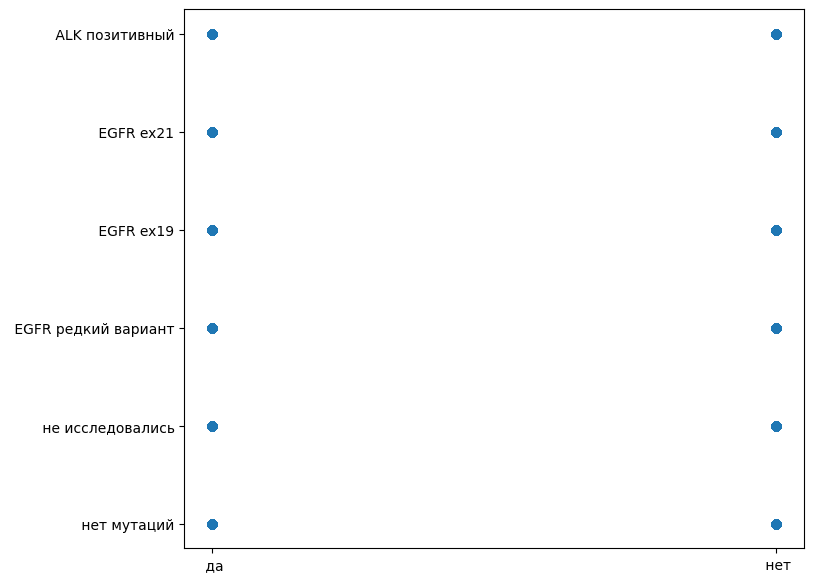

In [ ]:
plt.scatter(x=data['Ко-мутации KRAS'], y=data['Молекулярный статус (только для неплоскоклеточного рака)'])

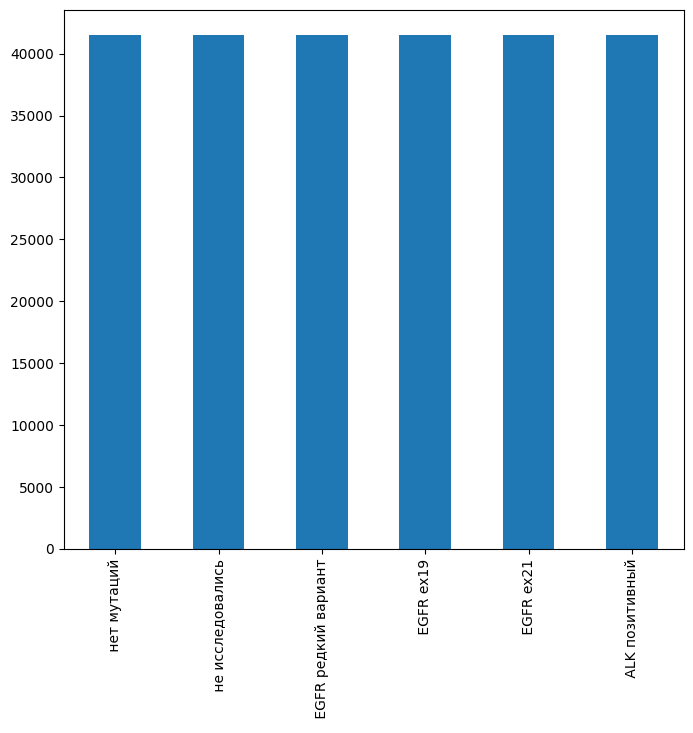

In [ ]:
data['Молекулярный статус (только для неплоскоклеточного рака)'].value_counts().iloc[:30].plot(kind='bar')
#plt.title('График Расс')
plt.show()

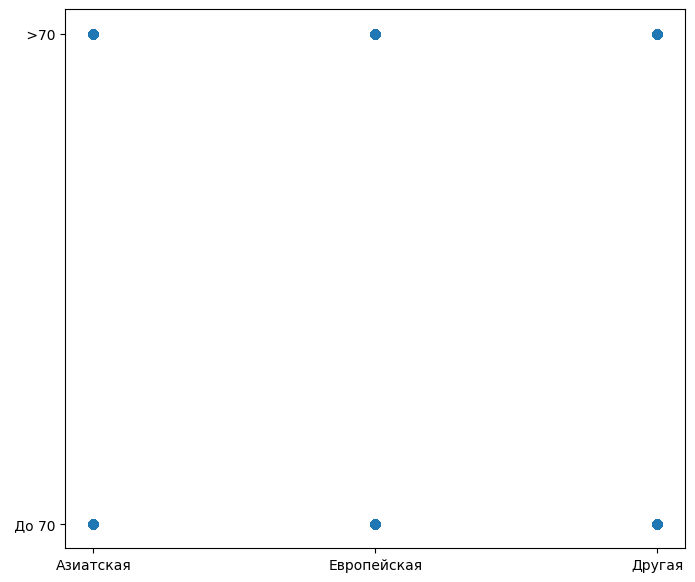

In [ ]:
plt.scatter(x=data['Раса'], y=data['Возраст'])

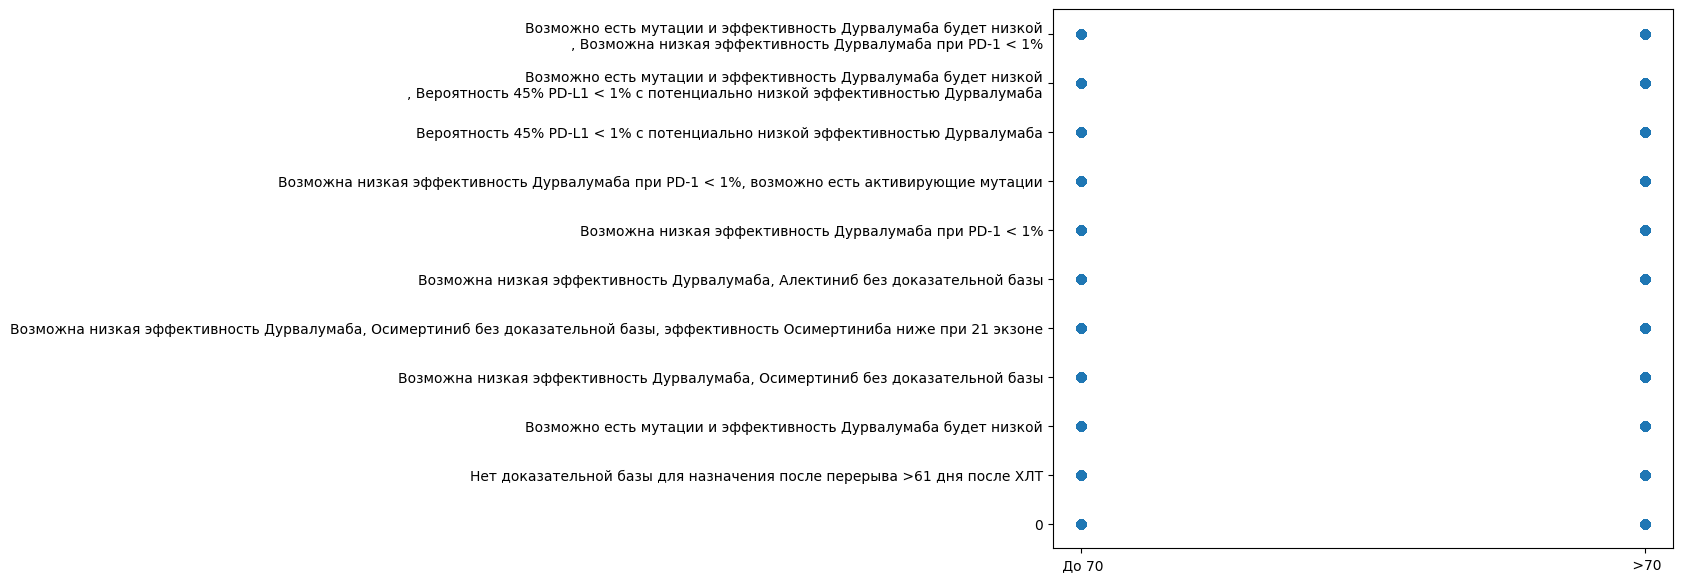

In [ ]:
plt.scatter(x=data['Возраст'], y=data['Комментарий'])